# Módulo 2: Modelos Preditivos e Séries Temporais

por Otávio Muraca


In [32]:
#Importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

In [5]:
#Importando dataset
url = "https://pycourse.s3.amazonaws.com/banknote_authentication.txt"
dataset = pd.read_csv(url, header=None, names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [8]:
dataset.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [16]:
#Verificando a presença de valore nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
#Qual o tamanho desse dataset (número de linhas, número de colunas)? 
print(f"O dataset possui {dataset.shape[0]} amostras e {dataset.shape[1]} características.")

O dataset possui 1372 amostras e 5 características.


In [11]:
#Qual variável possui o maior range (diferença entre valor máximo e mínimo)? 
for i in dataset:
  print(f"Range na coluna {i} é de: {dataset[i].max() - dataset[i].min()}.")

Range na coluna variance é de: 13.8669.
Range na coluna skewness é de: 26.7247.
Range na coluna curtosis é de: 23.2135.
Range na coluna entropy é de: 10.9977.
Range na coluna class é de: 1.


In [12]:
#Qual a média da coluna skewness? 
dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [14]:
#Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)? 

#((VALOR FINAL - VALOR INICIAL) / VALOR INICIAL) * 100

cedulasFalsas = round(abs((dataset['class'].value_counts()[1] - dataset.shape[0]) / dataset.shape[0]) * 100,2)
print(f"No dataset, foram encontradas {cedulasFalsas}% de notas falsas.")

No dataset, foram encontradas 55.54% de notas falsas.


## Correlações

<AxesSubplot:>

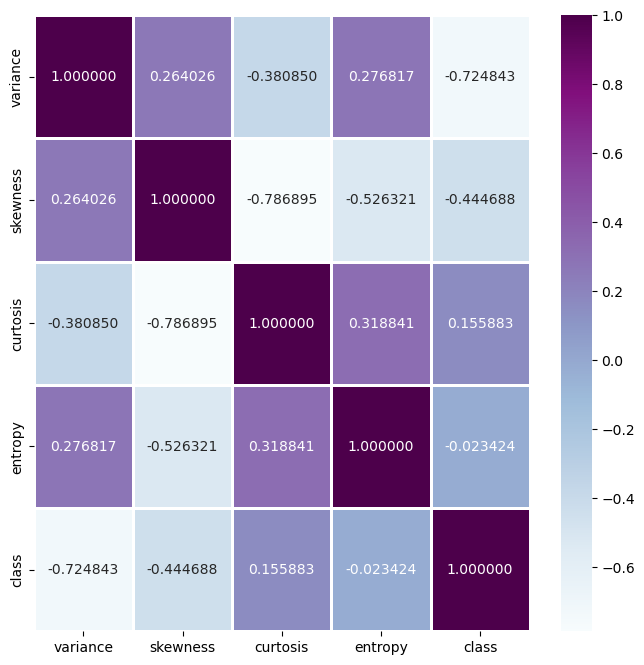

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=dataset.corr(), annot=True, linewidths=2, cmap='BuPu', fmt='.6f' )

## Escalas do dataset

<AxesSubplot:>

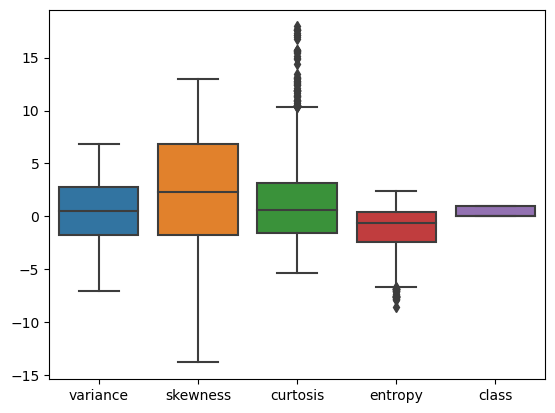

In [20]:
#Verificar a Escala
sns.boxplot(data=dataset)

In [21]:
#Capturando os nomes das colunas
dataset.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [23]:
#Padronizando as escalas
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

dataCopy = pd.DataFrame(dataset, columns=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
dataScaled = scaler.fit_transform(dataCopy.drop('class', axis=1).values)

dataSetScaled = pd.DataFrame(data=dataScaled, columns = dataCopy.columns.drop('class'))
dataSetScaled = pd.concat([dataSetScaled, dataCopy['class']], axis=1)
dataSetScaled.head(5)


,variance,skewness,curtosis,entropy,class
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0


<AxesSubplot:>

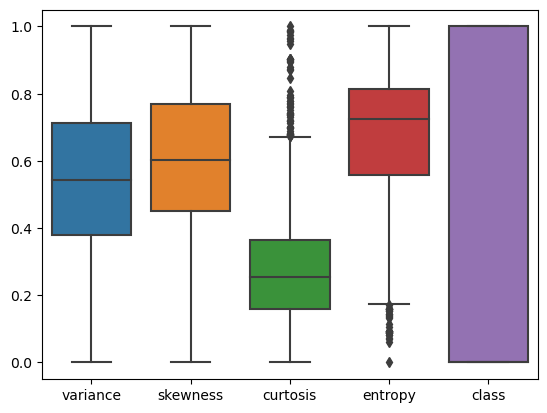

In [24]:
#Verificar a nova Escala
sns.boxplot(data=dataSetScaled)

## Divisão dos dados de TESTE/TREINAMENTO

In [25]:
x = dataSetScaled.iloc[:,0:-1].values #Selecionando as colunas de características
y = dataSetScaled.iloc[:,4].values #Selecionando a coluna resposta

In [26]:
#Dividindo as amostras entre TREINO/TEST
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(x, y, random_state= 1 , test_size=0.3)

## KNN

In [34]:
#Método KNN
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score
from sklearn.utils.multiclass import check_classification_targets
from sklearn.neighbors import KNeighborsClassifier

classifierKNN = KNeighborsClassifier(n_neighbors=5)
classifierKNN.fit(X_train, y_train)

y_pred = classifierKNN.predict(X_test)

print(f'A acurácia do algoritmo KNN foi de {round(accuracy_score(y_test, y_pred),5)}%.\n')

A acurácia do algoritmo KNN foi de 0.99757%.



## Árvore de Decisão

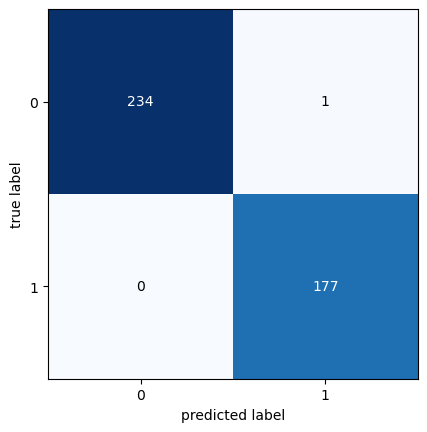

In [39]:
#Plotando a Árvore de Decisão

from mlxtend.plotting import plot_confusion_matrix
matrixConfusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrixConfusao)
plt.show()

In [40]:
#Método Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier, export_graphviz


classifierArvoreDecisao = DecisionTreeClassifier(random_state=1)
classifierArvoreDecisao.fit(X_train, y_train)

y_pred = classifierArvoreDecisao.predict(X_test)

print(f'A acurácia do algoritmo Árvore de Decisão foi de {round(accuracy_score(y_test, y_pred),5)}%.\n')

A acurácia do algoritmo Árvore de Decisão foi de 0.98786%.



## Algoritmo Floresta Aleatória (Random Forest)

In [41]:
#Método Algoritmo Floresta Aleatória (Random Forest)
from sklearn.ensemble import RandomForestClassifier

classifierRandomForest = RandomForestClassifier(max_depth=8, random_state=1)
classifierRandomForest.fit(X_train, y_train)

y_pred = classifierRandomForest.predict(X_test)

print(f'A acurácia do algoritmo Random Forest foi de {round(accuracy_score(y_test, y_pred),6)}%.\n')

A acurácia do algoritmo Random Forest foi de 0.995146%.



## SVM

In [42]:
#Método Algoritmo Floresta Aleatória (Random Forest)
from sklearn.svm import SVC

classifierSVM = SVC(gamma='scale',kernel='rbf', random_state=1)
classifierSVM.fit(X_train, y_train)

y_pred = classifierSVM.predict(X_test)

print(f'A acurácia do algoritmo SVM foi de {round(accuracy_score(y_test, y_pred),5)}%.\n')

A acurácia do algoritmo SVM foi de 1.0%.



## MLP

In [43]:
#Método Algoritmo MLP
from sklearn.neural_network import MLPClassifier

classifierMLP= MLPClassifier(hidden_layer_sizes=(100), solver='lbfgs', random_state=1) 
classifierMLP.fit(X_train, y_train)

y_pred = classifierMLP.predict(X_test)


print(f'A acurácia do algoritmo MLP foi de {round(accuracy_score(y_test, y_pred),5)}%.\n');

A acurácia do algoritmo MLP foi de 0.99757%.



## Feature Importances

In [47]:
dataset.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [44]:
#Analisando o valor da importância relativa das features do Random Forest (atributo feature_importances_)
#qual feature melhor contribuiu para a predição de class? 

featureImportances = classifierRandomForest.feature_importances_
featureLabels = ['variance','skewness','curtosis','entropy']

featureImportances = pd.Series(featureImportances, index=featureLabels)

featureImportances

variance    0.560667
skewness    0.240586
curtosis    0.140228
entropy     0.058519
dtype: float64

In [49]:
#end